# Surprise Housing Assignment
### Importing the libraries

In [1]:
import numpy as np # Math Functions
import pandas as pd #Data managment and processing 
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization 
import plotly.express as px # Advanced Data visualization 
import warnings # Avoid warings that might arrise from data visualization
warnings.filterwarnings('ignore')
import datetime # For time line analisys
import random

### Importing the data from the csv file provided

In [2]:
housing_df= pd.read_csv("Data/train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Adding code to see all the columns of data set
pd.set_option('display.max_columns', 81)
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### EDA and Cleaning the data 

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# ID Has all Unique values and is of no use to us,
housing_df.drop("Id",axis=1,inplace=True)

In [6]:
# MSSubClass is a catagorical variable holding numeric catagories lets replace numbers with thier catagories 
sorted(housing_df.MSSubClass.value_counts().index)

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]

In [7]:
msmap={20:"1storyNew",30:"1storyOld",40:"1storywAttic",45:"1_5storyUnF",50:"1_5storyF",60:"2storyNew",70:"2storyOld",75:"2_5story",
      80:"Multi",85:"Split",90:"Duplex",120:"1storyPUDnew",160:"2storyPUDnew",180:"PUDmulti",190:"2Family"}
housing_df.MSSubClass=housing_df.MSSubClass.map(msmap)

In [8]:
housing_df.MSSubClass.value_counts()

1storyNew       536
2storyNew       299
1_5storyF       144
1storyPUDnew     87
1storyOld        69
2storyPUDnew     63
2storyOld        60
Multi            58
Duplex           52
2Family          30
Split            20
2_5story         16
1_5storyUnF      12
PUDmulti         10
1storywAttic      4
Name: MSSubClass, dtype: int64

In [9]:
condmap={1:"VP",2:"PO",3:"FA",4:"BA",5:"AV",6:"AA",7:"GO",8:"VG",9:"EX",10:"VE"}
housing_df.OverallQual=housing_df.OverallQual.map(condmap)
housing_df.OverallCond=housing_df.OverallCond.map(condmap)

In [10]:
housing_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
# Lets look at missing Values
def missingVal(df):
   mDF=pd.DataFrame({"COlumn":df.columns,"MissingPercent":['%.2f' % (a/len(df)*100) for a in df.isnull().sum()],
   "feature":["Continuous" if df[col].dtype != 'O' else "Ordinal" for col in df.columns ]}) 
   return mDF

In [12]:
df=missingVal(housing_df)
df[df["MissingPercent"]!="0.00"].sort_values(by="MissingPercent",ascending=False)

COlumn MissingPercent     feature
71        PoolQC          99.52     Ordinal
73   MiscFeature          96.30     Ordinal
5          Alley          93.77     Ordinal
72         Fence          80.75     Ordinal
63    GarageCond           5.55     Ordinal
57    GarageType           5.55     Ordinal
58   GarageYrBlt           5.55  Continuous
59  GarageFinish           5.55     Ordinal
62    GarageQual           5.55     Ordinal
56   FireplaceQu          47.26     Ordinal
31  BsmtExposure           2.60     Ordinal
34  BsmtFinType2           2.60     Ordinal
29      BsmtQual           2.53     Ordinal
30      BsmtCond           2.53     Ordinal
32  BsmtFinType1           2.53     Ordinal
2    LotFrontage          17.74  Continuous
25    MasVnrArea           0.55  Continuous
24    MasVnrType           0.55     Ordinal
41    Electrical           0.07     Ordinal

In [13]:
# as per the data description PoolQc Na means that there is no pool , and less than 0.5% of houses have a pool we can drop
# it and its area
housing_df.drop(["PoolQC","PoolArea"],axis=1,inplace=True)

In [14]:
housing_df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [15]:
# we can convert this into shed true or false value as 49 houses have sheds and the rest of the features are too low in number
housing_df["Shed"]=np.where(housing_df['MiscFeature']=='Shed',1,0)
housing_df.drop("MiscFeature",axis=1,inplace=True)

In [16]:
housing_df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [17]:
# We know from the data description that null values for columns GarageType,Alley,Fence,FireplaceQu,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,
# BsmtExposure,GarageFinish,GarageQual,GarageCond,MasVnrType mean that there are no features . we can fill the null values with No
null_fill=["GarageType","Alley","Fence","FireplaceQu","BsmtFinType1","BsmtFinType2","BsmtQual","BsmtCond","BsmtExposure","GarageFinish","GarageQual","GarageCond","MasVnrType"]
for x in null_fill:
    housing_df[x].fillna("No",inplace=True)

In [18]:
df=missingVal(housing_df)
df[df.MissingPercent!="0.00"]

COlumn MissingPercent     feature
2   LotFrontage          17.74  Continuous
25   MasVnrArea           0.55  Continuous
41   Electrical           0.07     Ordinal
58  GarageYrBlt           5.55  Continuous

In [19]:
housing_df[housing_df.MasVnrArea.isna()].MasVnrType

234     No
529     No
650     No
936     No
973     No
977     No
1243    No
1278    No
Name: MasVnrType, dtype: object

In [20]:
# since the null values of area are for the houeses that dont have Masonry veneer we can fill it with 0
housing_df.MasVnrArea.fillna(0,inplace=True)

In [21]:
#Lets look at lotfrontage
housing_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

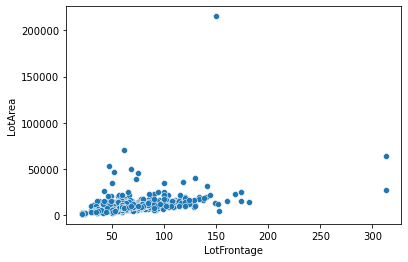

In [22]:
#Lets see if there is any relation between frontage and lot area 
sns.scatterplot(data=housing_df,x='LotFrontage',y='LotArea')
plt.show()

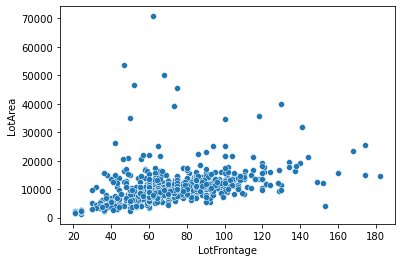

In [23]:
# we have a lot of outliers lets remove them for now 
temp=housing_df[housing_df.LotArea<100000]
temp2=temp[temp.LotFrontage<200]
sns.scatterplot(data=temp2,x='LotFrontage',y='LotArea')
plt.show()

We can see a liner realtion between the 2 and we can fill na with similar lot size values 


In [24]:
housing_df[housing_df.LotFrontage.isna()].LotArea

7       10382
12      12968
14      10920
16      11241
24       8246
        ...  
1429    12546
1431     4928
1441     4426
1443     8854
1446    26142
Name: LotArea, Length: 259, dtype: int64

In [25]:
housing_df[housing_df.LotFrontage.isna()].LotArea.describe()

count       259.000000
mean      13137.370656
std       16215.264451
min        1974.000000
25%        8065.500000
50%       10624.000000
75%       13018.500000
max      164660.000000
Name: LotArea, dtype: float64

In [26]:
housing_df.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [27]:
# The missing data is sperad out so we can fill it carefuly in blocks
housing_df['Lotcat']=pd.cut(housing_df.LotArea,bins=10,labels=[1,2,3,4,5,6,7,8,9,10],include_lowest=True)
housing_df.LotFrontage=housing_df.groupby('Lotcat')["LotFrontage"].apply(lambda x: x.fillna(x.mean()))
housing_df.drop("Lotcat",axis=1,inplace=True)

In [28]:
df=missingVal(housing_df)
df[df.MissingPercent!="0.00"]

COlumn MissingPercent     feature
2   LotFrontage           0.21  Continuous
41   Electrical           0.07     Ordinal
58  GarageYrBlt           5.55  Continuous

In [29]:
housing_df[housing_df.LotFrontage.isna()].LotArea.describe()

count         3.000000
mean     146269.666667
std       27099.461624
min      115149.000000
25%      137074.500000
50%      159000.000000
75%      161830.000000
max      164660.000000
Name: LotArea, dtype: float64

In [30]:
housing_df[housing_df.LotArea>100000]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
249  1_5storyF       RL          NaN   159000   Pave    No      IR2   
313  1storyNew       RL        150.0   215245   Pave    No      IR3   
335    2Family       RL          NaN   164660   Grvl    No      IR1   
706  1storyNew       RL          NaN   115149   Pave    No      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
249         Low    AllPub   CulDSac       Sev      ClearCr       Norm   
313         Low    AllPub    Inside       Sev       Timber       Norm   
335         HLS    AllPub    Corner       Sev       Timber       Norm   
706         Low    AllPub   CulDSac       Sev      ClearCr       Norm   

    Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
249       Norm     1Fam     1.5Fin          AA          GO       1958   
313       Norm     1Fam     1Story          GO          AV       1965   
335       Norm   2fmCon     1.5Fin          AV          AA       1965   
706       Norm     1Fam     1Story          GO          AV       1971   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
249          2006     Gable  CompShg     Wd Sdng     HdBoard     BrkCmn   
313          1965       Hip  CompShg     BrkFace     BrkFace       None   
335          1965     Gable  CompShg     Plywood     Plywood       None   
706          2002     Gable  CompShg     Plywood     Plywood      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
249       472.0        Gd        TA     CBlock       Gd       TA           Gd   
313         0.0        TA        TA     CBlock       Gd       TA           Gd   
335         0.0        TA        TA     CBlock       TA       TA           Gd   
706       351.0        TA        TA     CBlock       Gd       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
249          Rec         697          Unf           0        747         1444   
313          ALQ        1236          Rec         820         80         2136   
335          ALQ        1249          BLQ         147        103         1499   
706          GLQ        1219          Unf           0        424         1643   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
249    GasA        Gd          Y      SBrkr      1444       700             0   
313    GasW        TA          Y      SBrkr      2036         0             0   
335    GasA        Ex          Y      SBrkr      1619       167             0   
706    GasA        TA          Y      SBrkr      1824         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
249       2144             0             1         2         0             4   
313       2036             2             0         2         0             3   
335       1786             2             0         2         0             3   
706       1824             1             0         2         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
249             1          Gd             7        Typ           2   
313             1          TA             8        Typ           2   
335             1          TA             7        Typ           2   
706             1          Gd             5        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
249          TA     Attchd       1958.0          Fin           2         389   
313          Gd     Attchd       1965.0          RFn           2         513   
335          Gd     Attchd       1965.0          Fin           2         529   
706          TA     Attchd       1971.0          Unf           2         739   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
249         TA         TA          Y           0           98              0   
313      

In [31]:
#Such large Lots are rare and will create problems while scaling and can be dropped 
newdf=housing_df[housing_df.LotArea<100000]
housing_df=newdf

In [32]:
housing_df.Electrical.fillna(housing_df.Electrical.mode(),inplace=True)

In [33]:
housing_df[housing_df.GarageYrBlt.isna()].YearBuilt.describe()

count      81.000000
mean     1942.481481
std        29.664841
min      1872.000000
25%      1920.000000
50%      1940.000000
75%      1970.000000
max      2007.000000
Name: YearBuilt, dtype: float64

In [34]:
#We can assume that the garage was built at the same time as the house 
housing_df.GarageYrBlt.fillna(housing_df.YearBuilt,inplace=True)

#### All Missing Values filled.
### Univariant Analisys

In [35]:
#Custom funtions for analisys 
def count_show(col):
    pal=["tab10","hls","husl","Set2","Paired","flare","rocket","cubehelix"]
    sns.countplot(col,palette=random.choice(pal))
    plt.show()
    
def hist_show(col,y=7):
    pal=["tab10","hls","husl","Set2","Paired","flare"]
    sns.histplot(col,palette=random.choice(pal),bins=y,kde=True)
    plt.show()

In [36]:
# Catagorical Columns
Catcol=housing_df.select_dtypes(include=['object']).columns.tolist()
numcol=housing_df.select_dtypes(exclude=['object']).columns.to_list()

In [37]:
len(Catcol)

44

In [38]:
len(numcol)

34

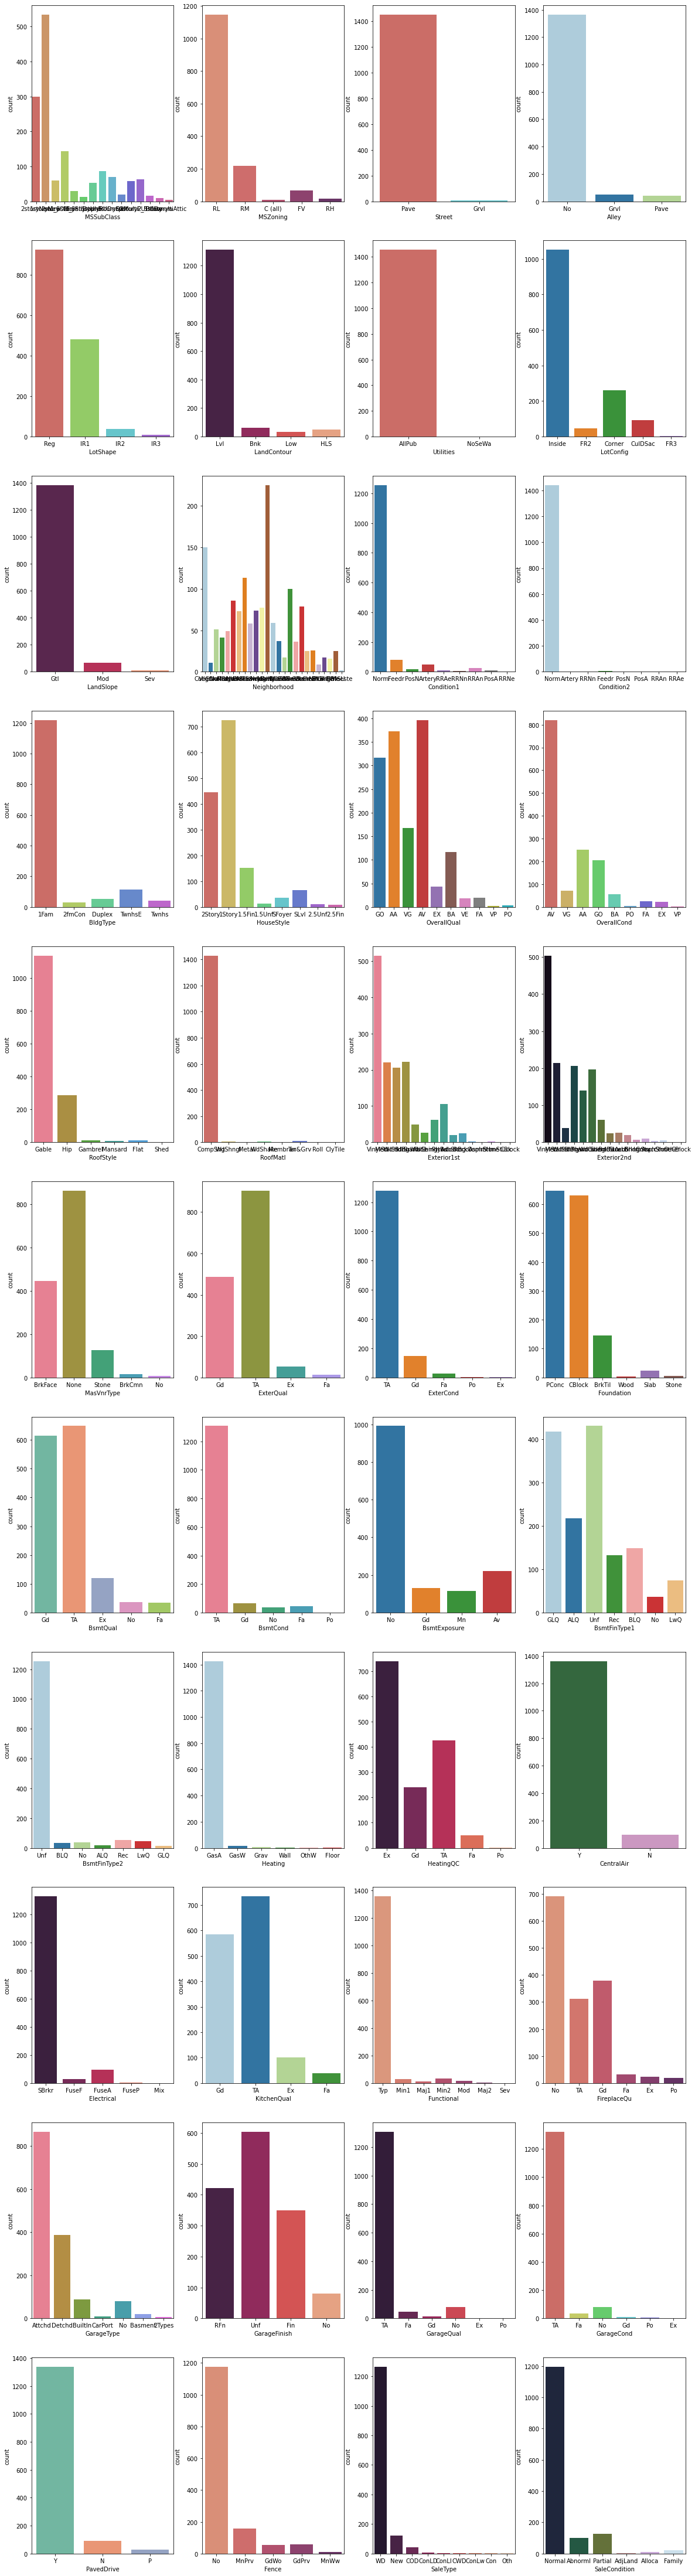

In [39]:
plt.figure(figsize=(20, 80))
r=1
pal=["tab10","hls","husl","Set2","Paired","flare","rocket","cubehelix"]
for c in Catcol:
    plt.subplot(11,4,r)
    sns.countplot(data=housing_df,x=c,palette=random.choice(pal))
    r=r+1
plt.show()

#### We observe that many columns are highly skewed and need to be dropped to build the ML Model 

<AxesSubplot:>

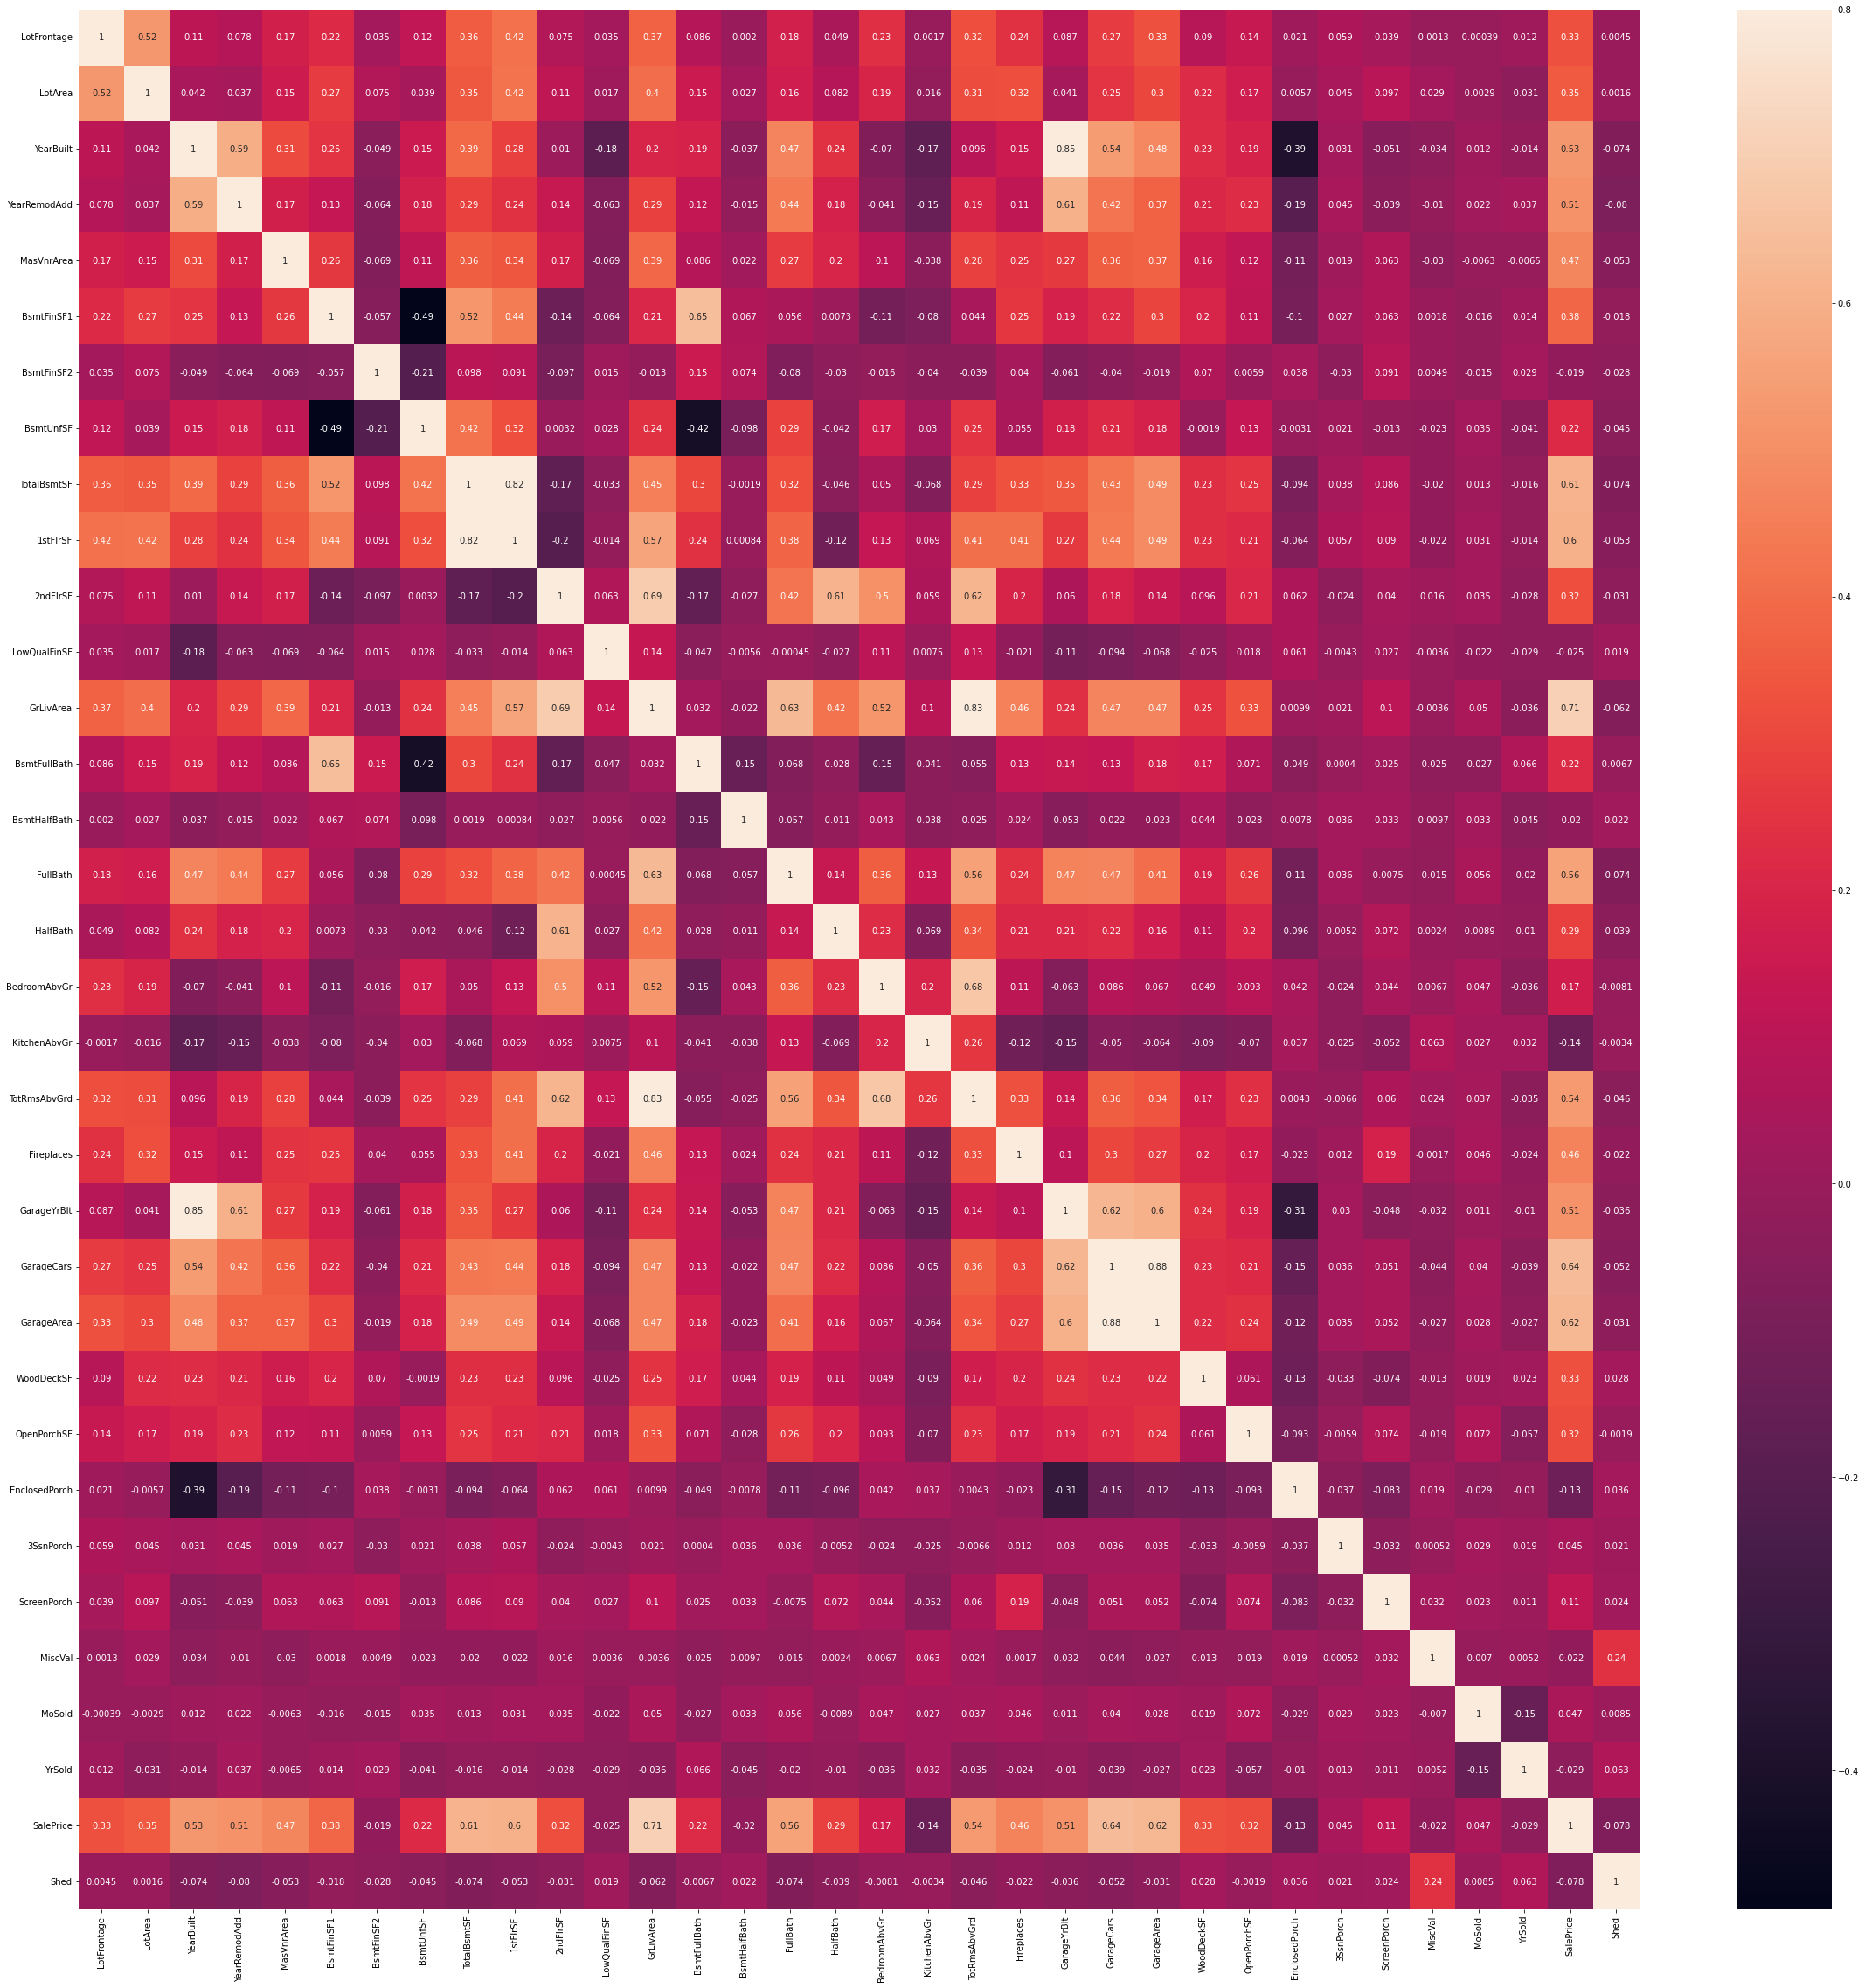

In [40]:

#Heatmap to see correlation between variables
plt.figure(figsize=(40, 40))
sns.heatmap(housing_df.corr(), annot = True,vmax=0.8)

In [41]:
#Skewed Columns
drp=['Alley','Heating','Functional','Utilities','LandSlope','LandContour','Electrical','Condition1','Condition2']
housing_df.drop(drp,axis=1,inplace=True)
for x in drp:
    Catcol.remove(x)

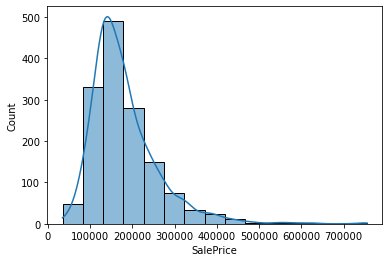

In [42]:
hist_show(housing_df.SalePrice,15)

Our Dependent Variable is also skewed but we can transform it with log function 

In [43]:
housing_df['Logsale']=np.log(housing_df.SalePrice)

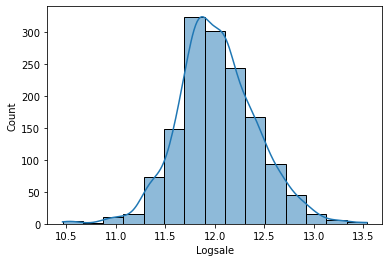

In [44]:
hist_show(housing_df.Logsale,15)
numcol.append("Logsale")

Now the data looks Normal and well spread

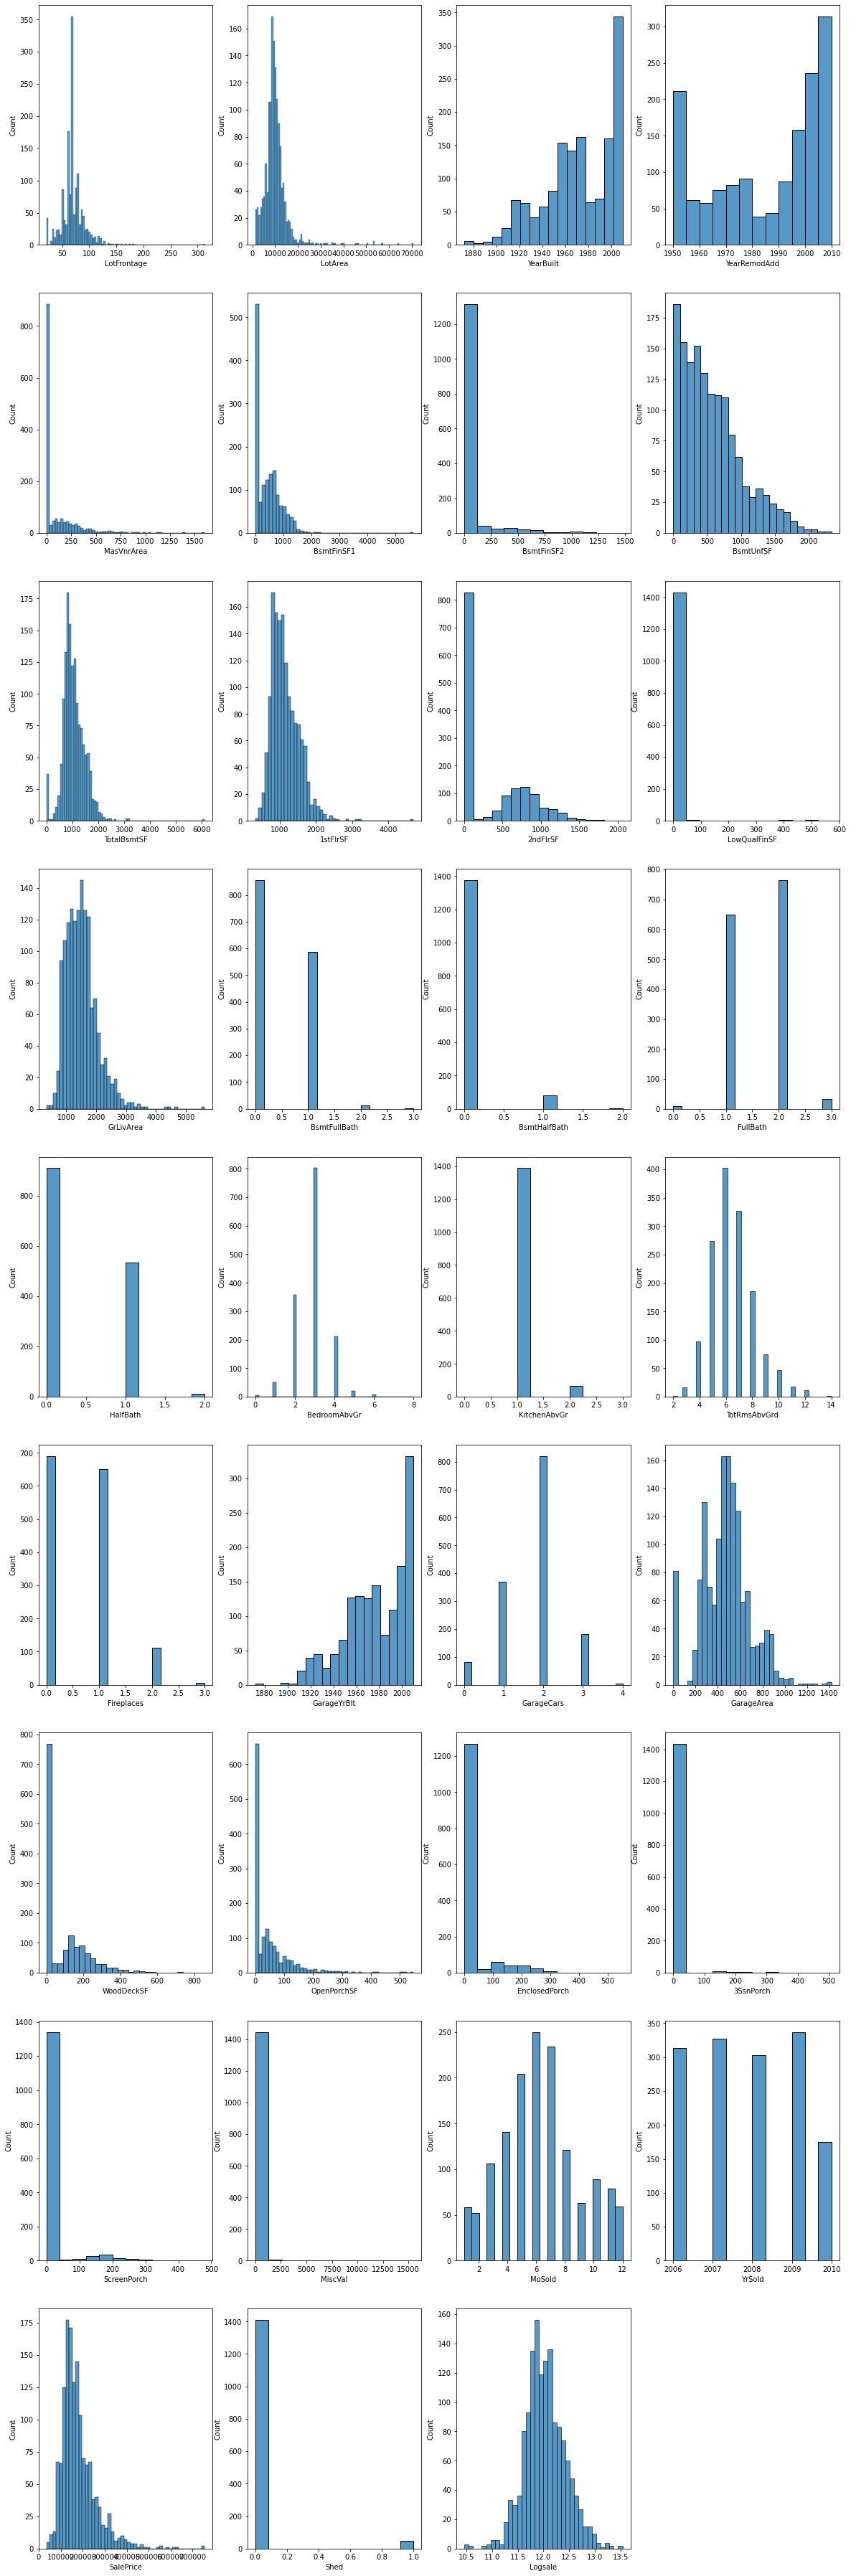

In [45]:
# Lets chceck the numeric columns 
plt.figure(figsize=(20, 80))
r=1
for c in numcol:
    plt.subplot(11,4,r)
    sns.histplot(data=housing_df,x=c)
    r=r+1
plt.show()

In [46]:
# shed is a catagoric column but is hightly scwed and can be dropped 
housing_df.drop("Shed",axis=1,inplace=True)

In [47]:
numcol.remove("Shed")

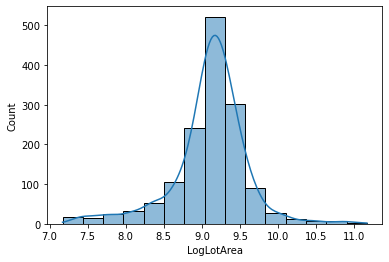

In [48]:
# Lot area is right taled and can be normalized with log funtion 
housing_df['LogLotArea']=np.log(housing_df.LotArea)
hist_show(housing_df.LogLotArea,15)

In [49]:
housing_df.drop("LotArea",axis=1,inplace=True)
numcol.remove("LotArea")
numcol.append("LogLotArea")

In [50]:
#Lets move the logsaleprice back to saleprice and remove logsaleprice
housing_df.SalePrice=housing_df.Logsale
housing_df.drop("Logsale",axis=1,inplace=True)

In [51]:
numcol.remove("Logsale")

In [52]:
#Year built can be used as age of property and remodel can be years since remodel Assuming we are looking at currrent year data
housing_df['Age']=2022-housing_df.YearBuilt
housing_df['YrSinceRemod']=2022-housing_df.YearRemodAdd

In [53]:
housing_df.YrSinceRemod.describe()

count    1456.000000
mean       37.133242
std        20.648326
min        12.000000
25%        18.000000
50%        28.000000
75%        55.000000
max        72.000000
Name: YrSinceRemod, dtype: float64

In [54]:
#we can now drop year of build and remod
housing_df.drop(["YearBuilt","YearRemodAdd"],axis=1,inplace=True)


In [55]:
#Checking the Three season porch area column as the chart shows too low values 
len(housing_df[housing_df["3SsnPorch"]>0])

24

Less than 2% of the column has any data so we can drop this column

In [56]:
housing_df.drop("3SsnPorch",axis=1,inplace=True)

In [57]:
# Low quality furnished column also has very few useable values in the chart so we can check it 
len(housing_df[housing_df["LowQualFinSF"]>0])

26

Here to we are below 2% of usable data so we can drop this column

In [58]:
housing_df.drop("LowQualFinSF",axis=1,inplace=True)

In [59]:
# Value of miscellaneous feature also has very few useable values in the chart so we can check it 
len(housing_df[housing_df["MiscVal"]>0])

50

Only 3.5% of the data is usable and can be dropped 

In [60]:
housing_df.drop("MiscVal",axis=1,inplace=True)

In [61]:
for x in ['3SsnPorch',"YearBuilt","YearRemodAdd","LowQualFinSF","MiscVal"]:
    numcol.remove(x)

### Before we start building dummy variables lets see if we can consolidate anhy catagoric / oridanal columns

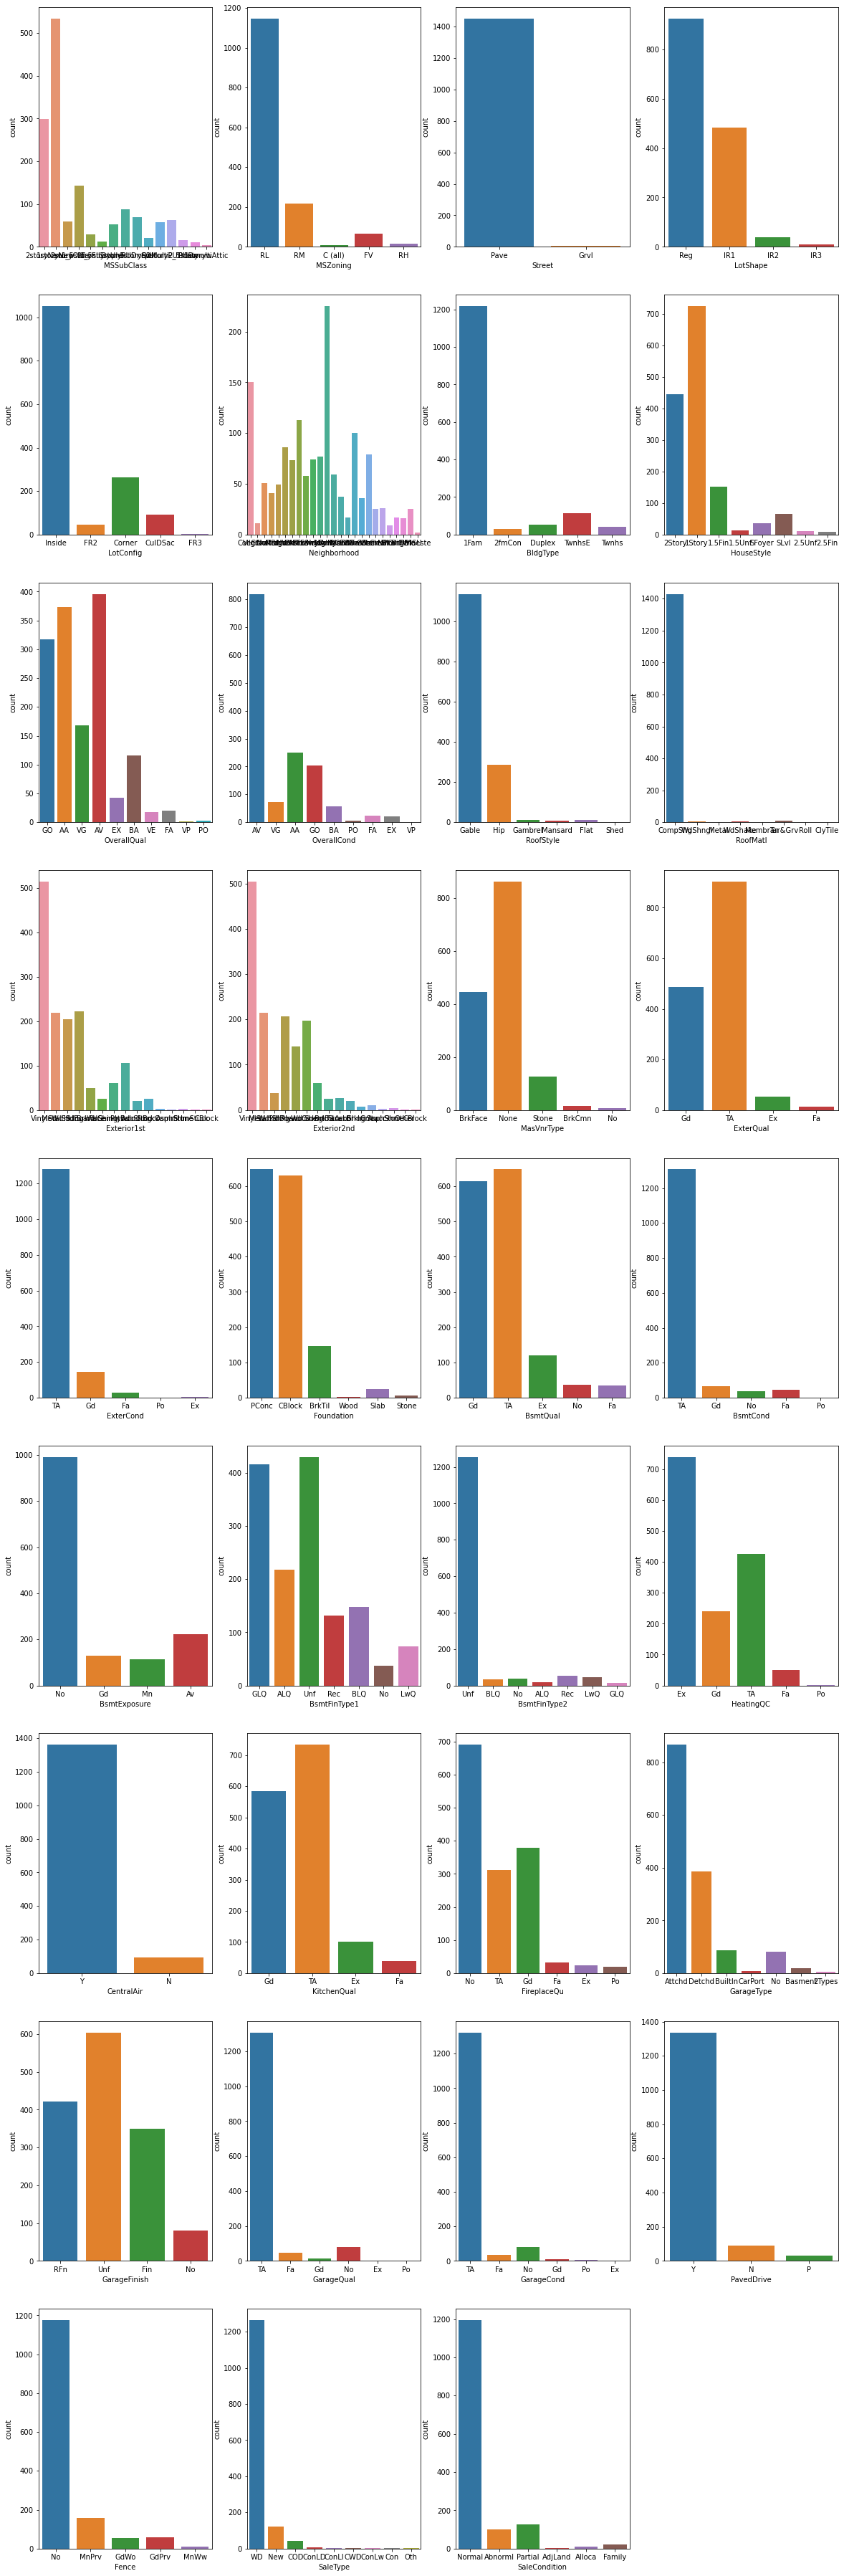

In [62]:
plt.figure(figsize=(20, 80))
r=1
for c in Catcol:
    plt.subplot(11,4,r)
    sns.countplot(data=housing_df,x=c)
    r=r+1
plt.show()

In [63]:
#street column is again holding only 1 value with the gravel being less than 5% in the data so we can drop that  
housing_df.drop("Street",axis=1,inplace=True)

In [64]:
Catcol.remove("Street")

In [65]:
#Sale type can be consolidated to Warranty Deed and others
housing_df.loc[housing_df.SaleType=="WD","SaleType"]=1
housing_df.loc[housing_df.SaleType!=1,"SaleType"]=0

In [66]:
housing_df.SaleType.value_counts()

1    1263
0     193
Name: SaleType, dtype: int64

In [67]:
# we can also consolidate fence as 1 for present and 0 for not present 
housing_df.loc[housing_df.Fence=="NO","Fence"]=0
housing_df.loc[housing_df.Fence!=0,"Fence"]=1

In [68]:
#lets have a list of all that columns that need to be made into dummy
dum=Catcol
dum.remove("SaleType") # we have already hotcoded this
dum.remove("Fence")# we have already hotcoded this

We notice a lot of outliers in the data , we will work on the same now

In [69]:
# custom funtion to remove outliers 
def outdrop(df,col):
    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.75)
    val=1.5*(q2-q1)
    lower_val=q1-val
    upper_val=q2+val
    out=df[(df[col]>lower_val) & (df[col]<upper_val)]
    return out


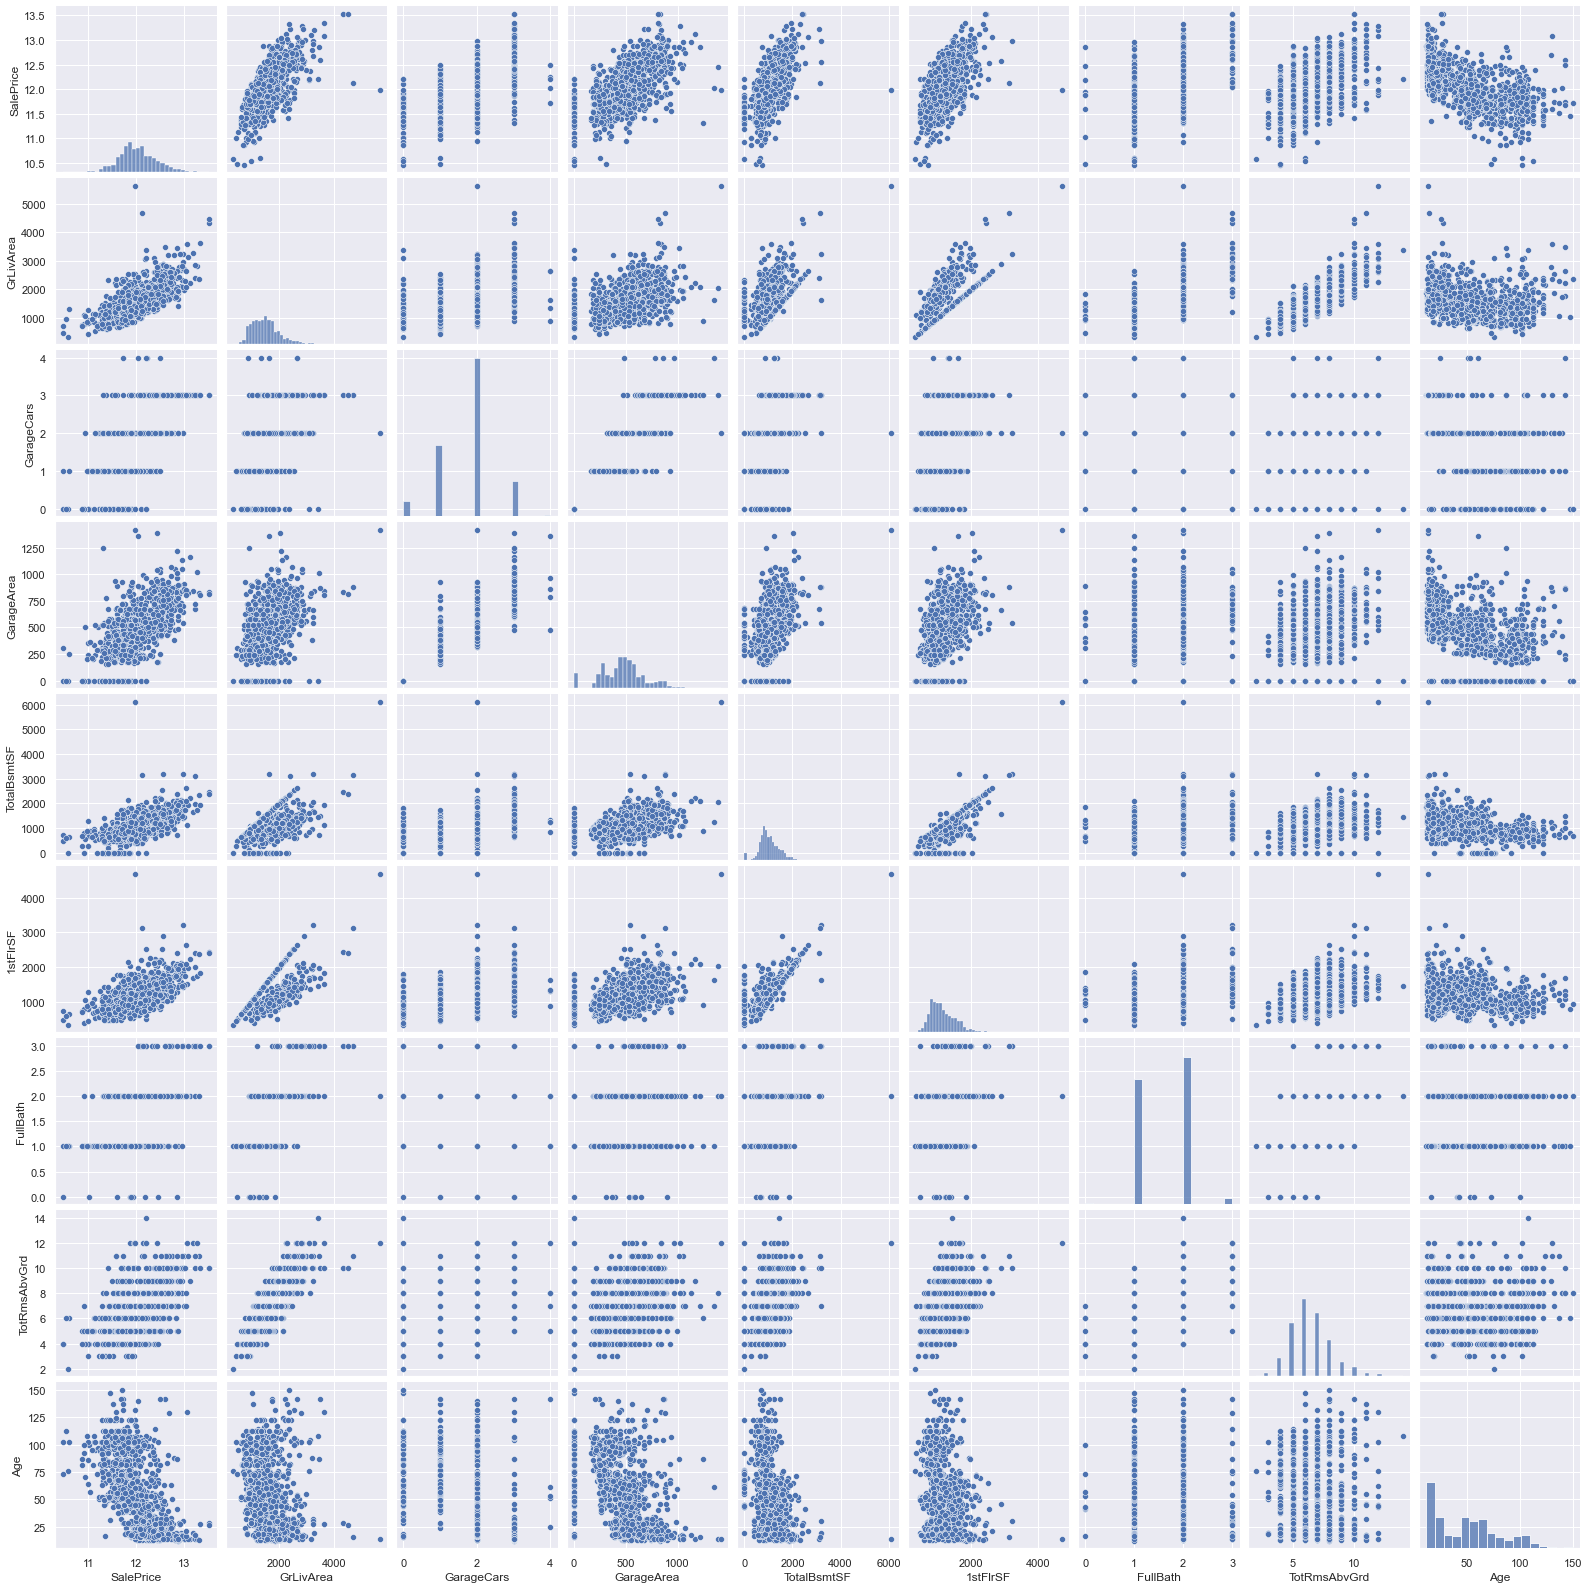

In [70]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF','FullBath', 'TotRmsAbvGrd','Age']
sns.pairplot(housing_df[cols], size = 2.5)
plt.show();

In [71]:
# we can see a lot of outliers in GrLivArea
old=len(housing_df)
housing_df=outdrop(housing_df,"GrLivArea")
new=len(housing_df)
print("Dropped",(old-new),"Rows")

Dropped 31 Rows


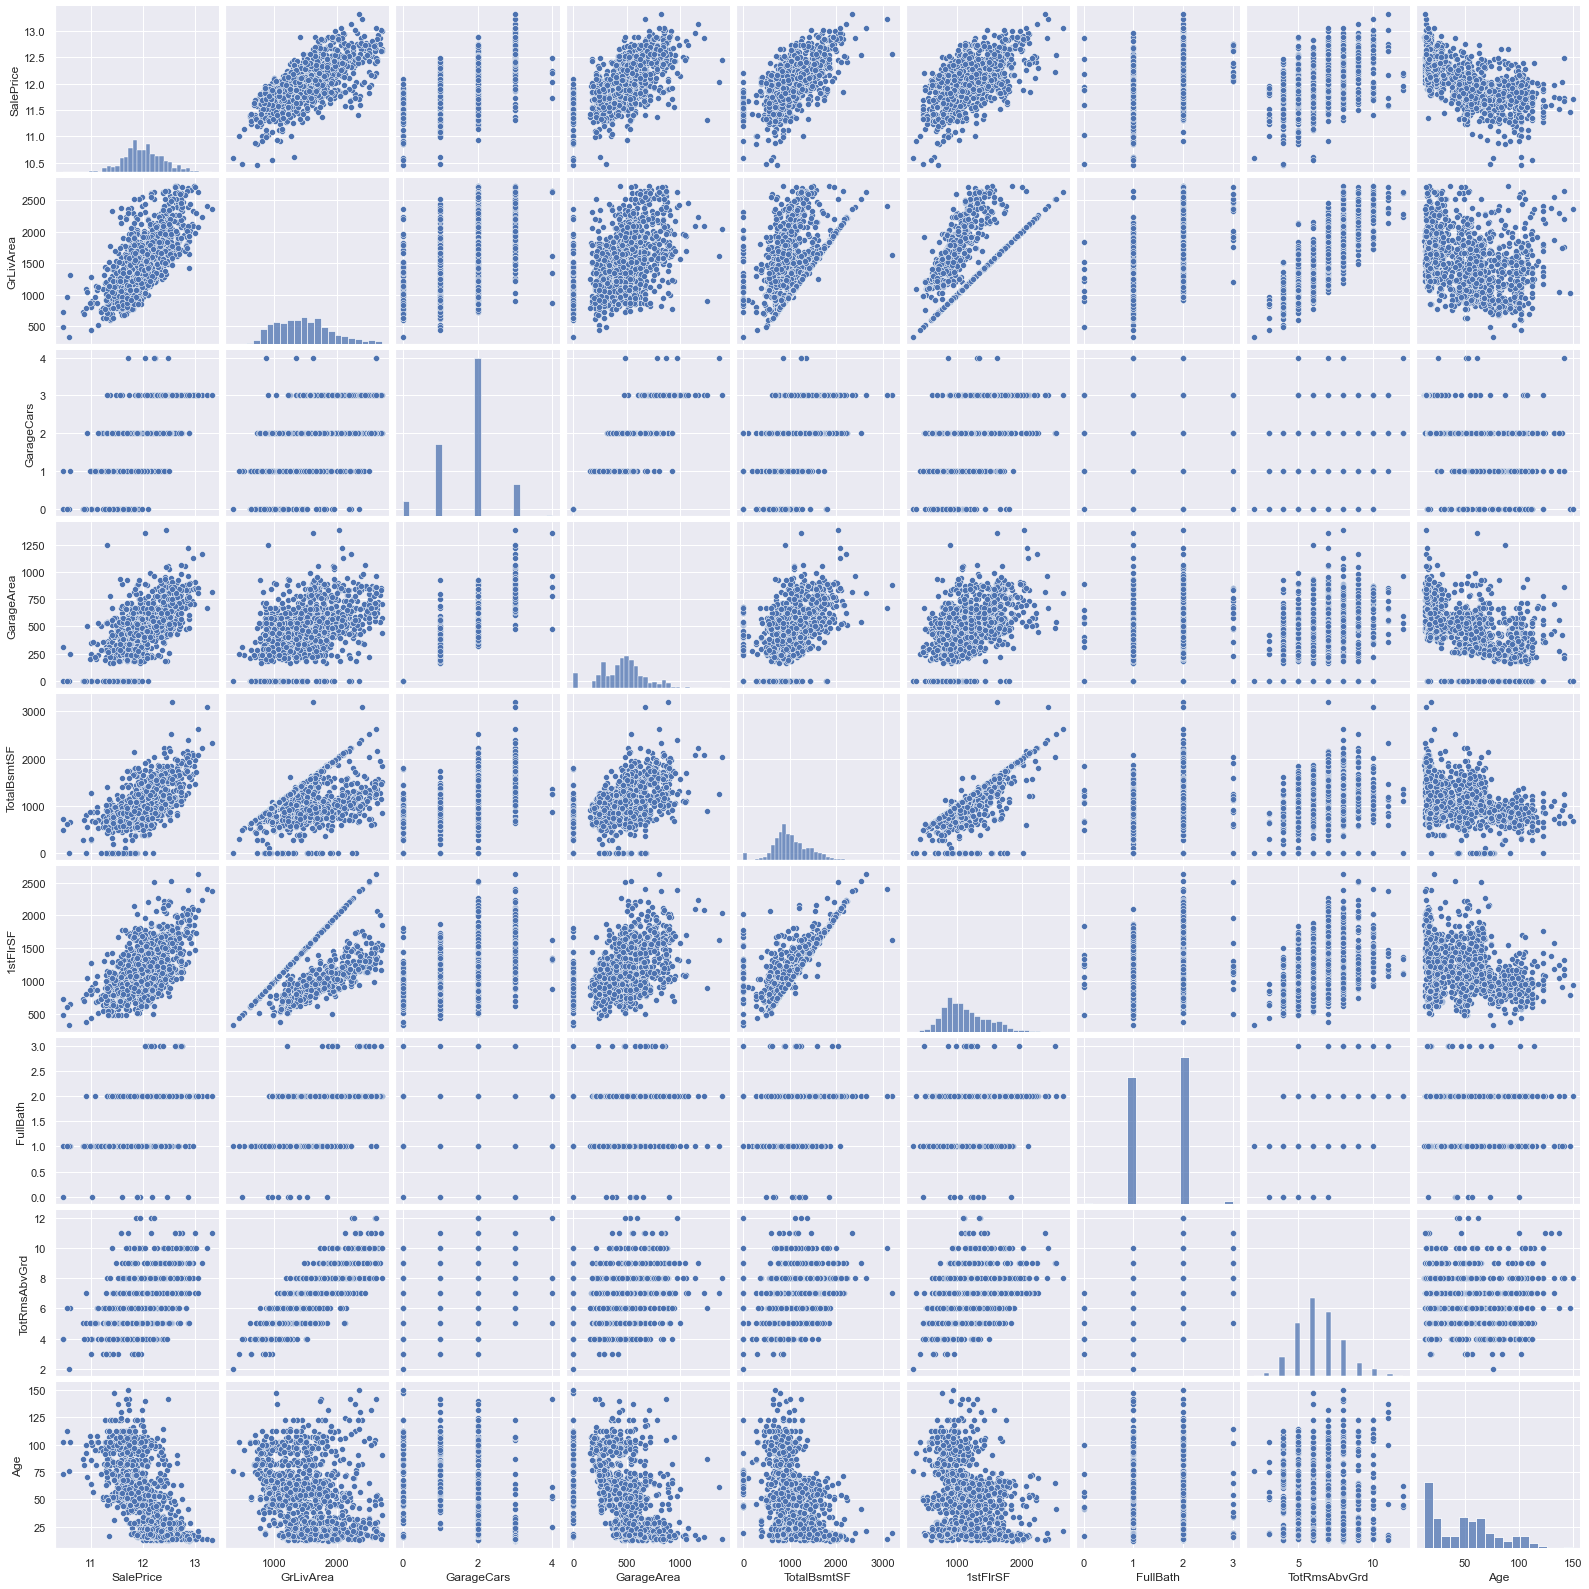

In [72]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF','FullBath', 'TotRmsAbvGrd','Age']
sns.pairplot(housing_df[cols], size = 2.5)
plt.show();

### Now the Realtions look better 

In [73]:
numcol.append("Age")

Text(0.5, 1.0, 'GarageCars vs SalePrice')

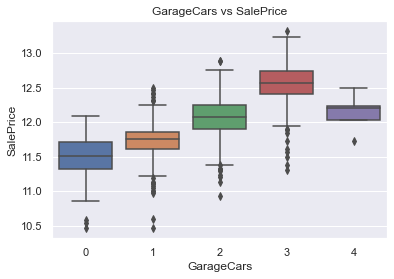

In [74]:
#Lets check the box plots of all the catagoric values 
sns.boxplot(x='GarageCars', y='SalePrice', data=housing_df)
plt.title("GarageCars vs SalePrice")

Text(0.5, 1.0, 'Age vs SalePrice')

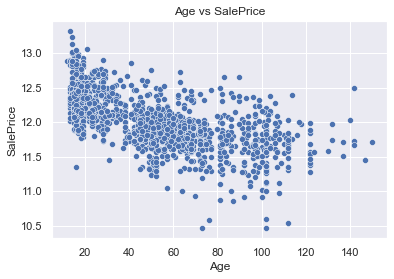

In [75]:
sns.scatterplot(x='Age', y='SalePrice', data=housing_df)
plt.title("Age vs SalePrice")

Text(0.5, 1.0, 'GarageArea vs SalePrice')

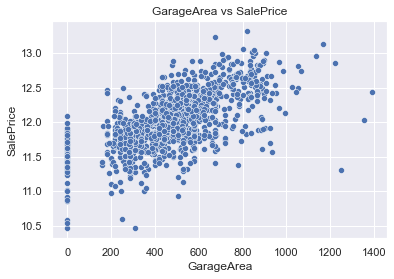

In [76]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=housing_df)
plt.title("GarageArea vs SalePrice")

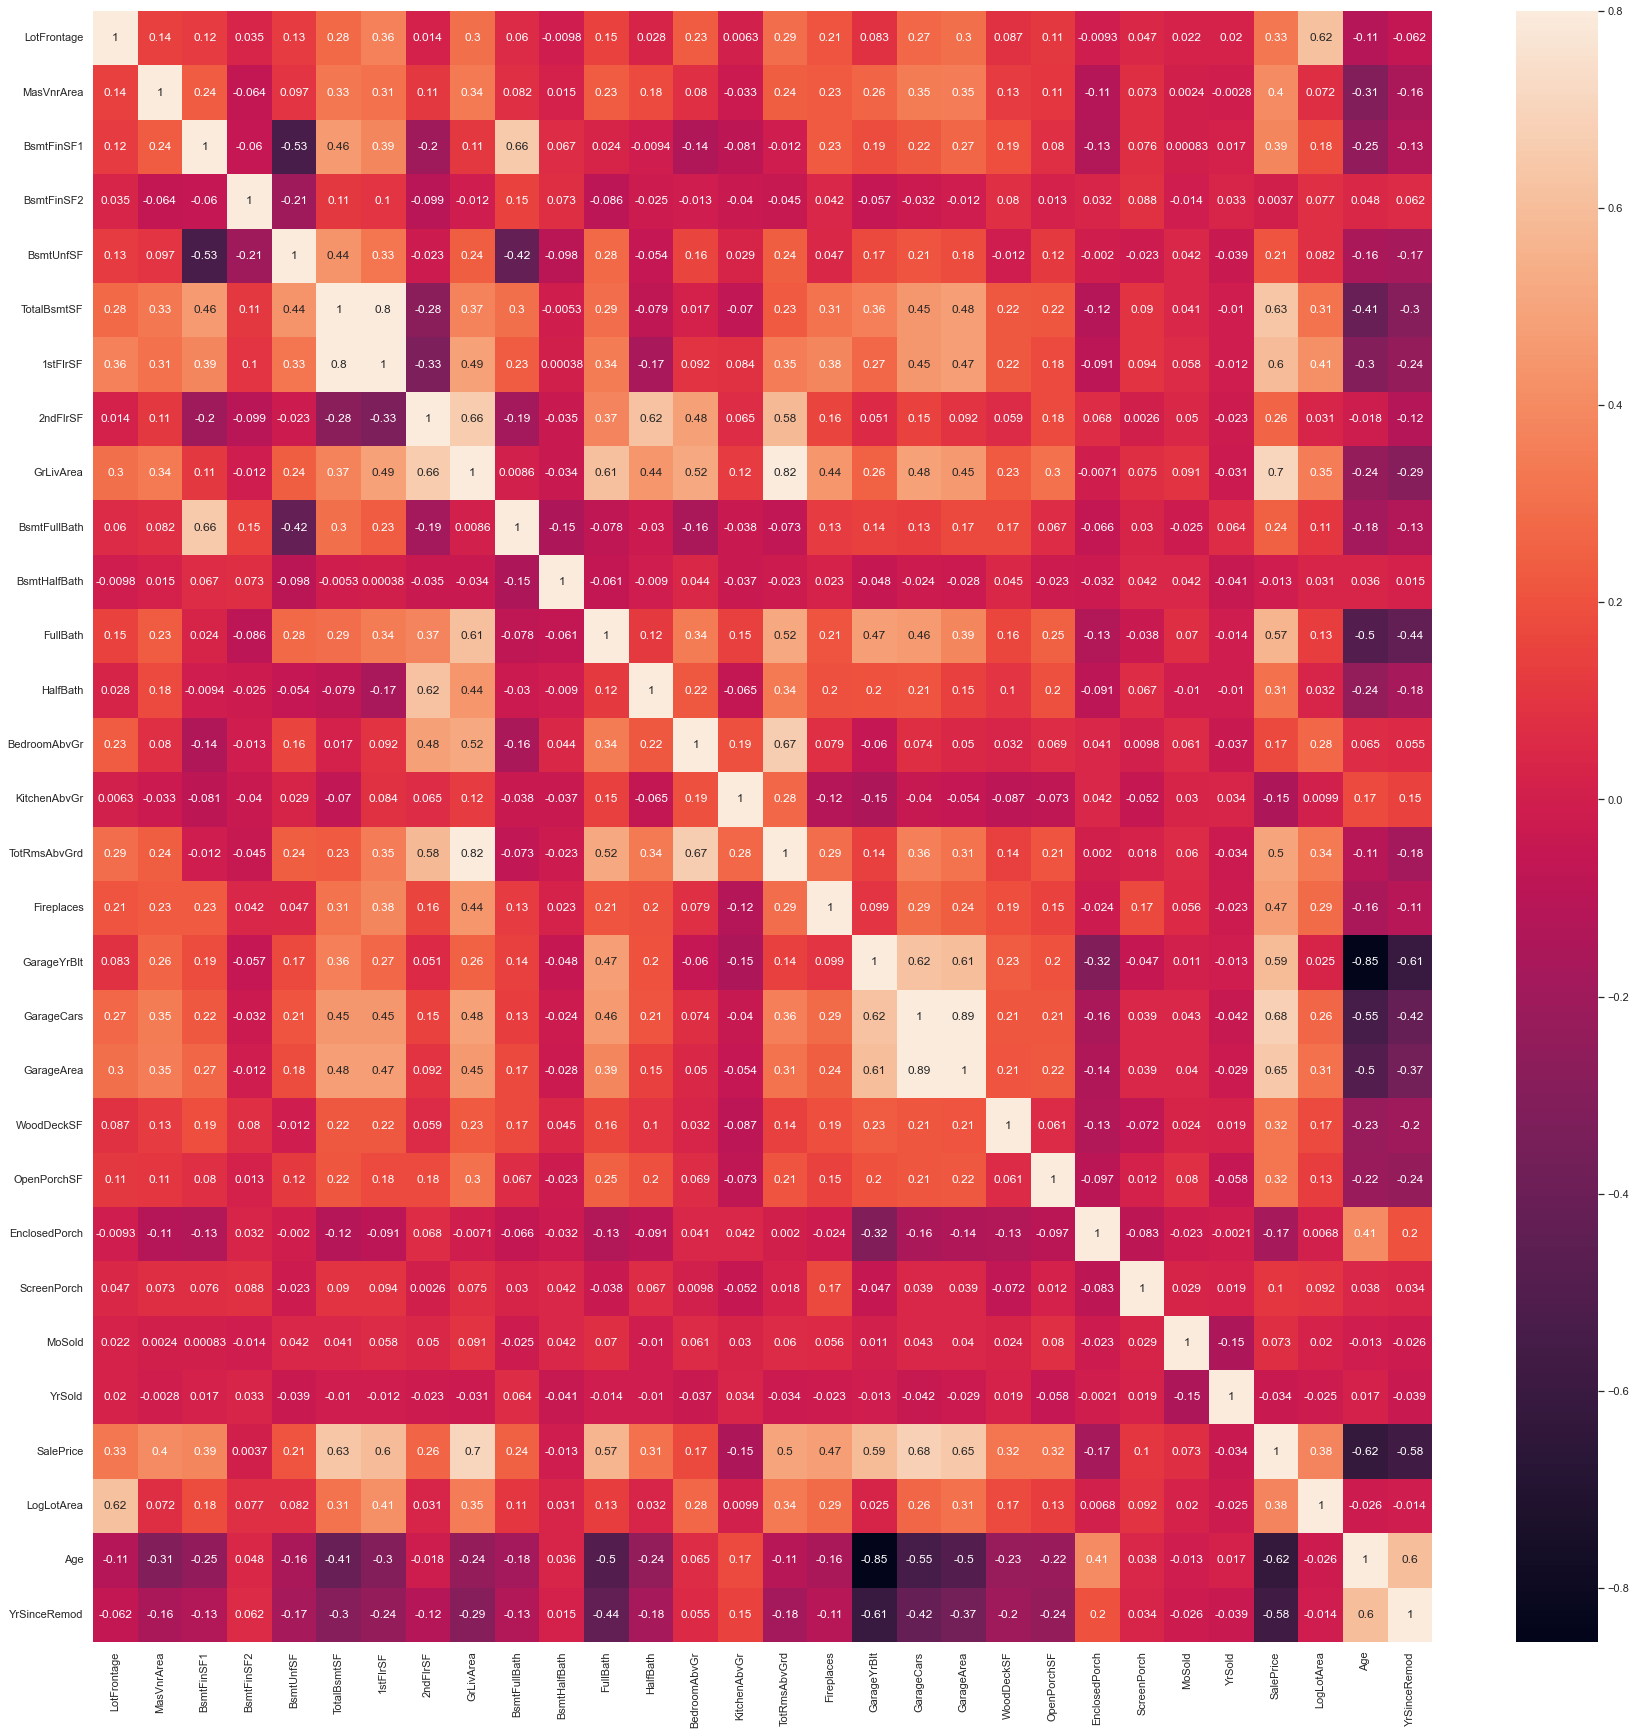

In [77]:
# Lets look at heatmap to find the best corriation between target and pridictor variables 
plt.figure(figsize=(30,30))
sns.heatmap(housing_df.corr(),annot=True,vmax=0.8)
plt.show()

Text(0.5, 1.0, 'OverallQual vs SalePrice')

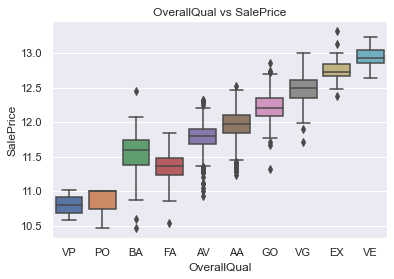

In [78]:
#['OverallQual','GrLivArea','GarageCars','GarageArea'] are highly correlated to target variable 
df=pd.DataFrame()
df['OverallQual']=housing_df.OverallQual
df['SalePrice']=housing_df.SalePrice
df["OverallQual"]=pd.Categorical(df["OverallQual"])
my_ord=["VP","PO","BA","FA","AV","AA","GO","VG","EX","VE"]
df['OverallQual'].cat.reorder_categories(my_ord, inplace= True)
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("OverallQual vs SalePrice")

## Final observations of all EDA 
* There is no realtion between the age of the house and the sale price
* The houses with larger living areas and larger garages genraly sell at higher prices
* the houses with more garages have higher sale value 
* The houses with better quality have better price 

In [79]:
numcol=housing_df.select_dtypes(include=["float64","int64"])
numcol.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold',
       'YrSold', 'SalePrice', 'LogLotArea', 'Age', 'YrSinceRemod'],
      dtype='object')

In [80]:
catcol=housing_df.select_dtypes(exclude=["float64","int64"])
catcol.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [81]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
catcol['CentralAir'] = catcol['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
catcol['PavedDrive'] = catcol['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [82]:
dums=pd.DataFrame()
for x in catcol.columns.to_list():
    temp=pd.get_dummies(catcol[x],drop_first=True,prefix_sep="_",prefix=x)
    dums=pd.concat([dums,temp],axis=1)
pd.set_option('display.max_columns',None)
dums

MSSubClass_1_5storyUnF  MSSubClass_1storyNew  MSSubClass_1storyOld  \
0                          0                     0                     0   
1                          0                     1                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
1455                       0                     0                     0   
1456                       0                     1                     0   
1457                       0                     0                     0   
1458                       0                     1                     0   
1459                       0                     1                     0   

      MSSubClass_1storyPUDnew  MSSubClass_1storywAttic  MSSubClass_2Family  \
0                           0                        0                   0   
1                           0                        0                   0   
2                           0                        0                   0   
3                           0                        0                   0   
4                           0                        0                   0   
...                       ...                      ...                 ...   
1455                        0                        0                   0   
1456                        0                        0                   0   
1457                        0                        0                   0   
1458                        0                        0                   0   
1459                        0                        0                   0   

      MSSubClass_2_5story  MSSubClass_2storyNew  MSSubClass_2storyOld  \
0                       0                     1                     0   
1                       0                     0                     0   
2                       0                     1                     0   
3                       0                     0                     1   
4                       0                     1                     0   
...                   ...                   ...                   ...   
1455                    0                     1                     0   
1456                    0                     0                     0   
1457                    0                     0                     1   
1458                    0                     0                     0   
1459                    0                     0                     0   

      MSSubClass_2storyPUDnew  MSSubClass_Duplex  MSSubClass_Multi  \
0                           0                  0                 0   
1                           0                  0                 0   
2                           0                  0                 0   
3                           0                  0                 0   
4                           0                  0                 0   
...                       ...                ...               ...   
1455                        0                  0                 0   
1456                        0                  0                 0   
1457                        0                  0                 0   
1458                        0                  0                 0   
1459                        0                  0                 0   

      MSSubClass_PUDmulti  MSSubClass_Split  MSZoning_FV  MSZoning_RH  \
0                       0                 0            0            0   
1                       0                 0            0            0   
2                       0                 0            0            0   
3                       0                 0            0            0   
4                       0                 0            0            0   


In [83]:
scalecol=numcol.columns.to_list()#List of columns that we will scale 

In [84]:
finaldf=pd.concat([numcol,dums],axis=1)

In [85]:
finaldf.shape

(1425, 225)

### split Train and test

In [86]:
X=finaldf.drop("SalePrice",axis=1)

In [87]:
y=finaldf['SalePrice']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

### Scaling Data 

In [89]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_var=numcol.columns.to_list()
num_var.remove("SalePrice")
X_train[num_var]=scaler.fit_transform(X_train[num_var])
X_test[num_var]=scaler.transform(X_test[num_var])

### Building a LinearRegression() Model

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lm1= LinearRegression()
lm1.fit(X_train,y_train)
rfe= RFE(lm1,15) # Automated feature selection 
rfe= rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 114),
 ('MasVnrArea', False, 61),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 23),
 ('2ndFlrSF', False, 22),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 59),
 ('BsmtHalfBath', False, 89),
 ('FullBath', False, 57),
 ('HalfBath', False, 113),
 ('BedroomAbvGr', False, 30),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 29),
 ('Fireplaces', False, 65),
 ('GarageYrBlt', False, 208),
 ('GarageCars', True, 1),
 ('GarageArea', False, 128),
 ('WoodDeckSF', False, 49),
 ('OpenPorchSF', False, 154),
 ('EnclosedPorch', False, 35),
 ('ScreenPorch', False, 36),
 ('MoSold', False, 187),
 ('YrSold', False, 171),
 ('LogLotArea', False, 7),
 ('Age', True, 1),
 ('YrSinceRemod', False, 18),
 ('MSSubClass_1_5storyUnF', False, 55),
 ('MSSubClass_1storyNew', False, 165),
 ('MSSubClass_1storyOld', False, 56),
 ('MSSubClass_1storyPUDnew', False, 210),
 ('MSSubClass_1storywAttic', False, 166),
 (

In [91]:
cols=X_train.columns[rfe.support_]
list(cols)

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'KitchenAbvGr',
 'GarageCars',
 'Age',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'OverallCond_FA',
 'RoofMatl_Membran',
 'GarageQual_Po']

In [92]:
drop_cols=X_train.columns[~rfe.support_].to_list

In [93]:
X_train_rfe=X_train[list(cols)]

In [94]:
lm2=LinearRegression()
lm2.fit(X_train_rfe,y_train)

LinearRegression()

In [95]:
# Print the coefficients and intercept
print(lm2.intercept_)
print(lm2.coef_)

11.04009913630597
[-4.07715854e+11 -2.74667810e+11 -4.35294440e+11  5.97411804e+11
  9.17572021e-01 -4.19998169e-01  3.40118408e-01 -4.04571533e-01
  5.59555054e-01  5.06896973e-01  5.09521484e-01  4.44335938e-01
 -3.61854076e-01  4.08758163e-01 -4.22277927e-01]


In [96]:
from sklearn.metrics import r2_score, mean_squared_error

In [97]:
y_pred_train = lm2.predict(X_train_rfe)
y_pred_test = lm2.predict(X_test[list(cols)])

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Rss Train:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Rss Test",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train:",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 Train: 0.8585273001116821
R2 Test 0.8243362155041014
Rss Train: 20.251121268981436
Rss Test 11.592839919515077
MSE Train: 0.02031205744130535
MSE Test 0.027086074578306255


We have R2 on Train as 86% and test R2 is 82% which is good but we can try to improve it  

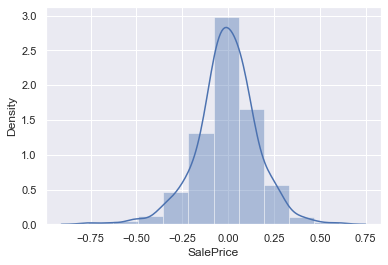

In [98]:
# Looking at errors
sns.distplot((y_test-y_pred_test), bins=10)
plt.show()

## Ridge Regression
Lets try and predict using Ridge 

In [99]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, Overfitting wont be fixed 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [100]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
print(model_cv.best_params_)

{'alpha': 4.0}


In [102]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.51364087e-02  2.97666701e-02  1.43783398e-01  7.47622162e-02
  6.77706509e-02  1.81880793e-01  1.74109690e-01  1.17857546e-01
  2.34325353e-01  9.27179122e-02  3.53524169e-02  9.62828804e-02
  5.13031859e-02  2.17681032e-02 -3.24141325e-02  8.14290168e-02
  4.34699377e-02  9.57389330e-03  7.96364321e-02  8.23183255e-02
  7.63014431e-02  7.47563181e-03  5.27256401e-02  6.48381169e-02
  7.29945294e-03 -1.94907932e-02  1.34038325e-01 -1.11799342e-01
 -6.07933974e-02 -1.23346598e-02  1.27058508e-02 -8.41299661e-02
 -6.56533430e-03 -1.28088530e-03 -1.27924236e-02  2.04942494e-02
  3.69571235e-02  5.96114361e-02 -2.42581850e-02  7.53690667e-03
 -1.24254810e-02 -1.42378926e-02  8.88253733e-03  8.34444761e-02
  7.68792595e-02  5.44612993e-02  1.77804955e-02  3.00536873e-02
  9.54402440e-03  6.73502387e-03  3.20199188e-02 -2.32841886e-02
 -2.85380884e-02 -1.37008681e-02  7.68158914e-03 -2.05337449e-02
  8.48047014e-03  3.68480848e-02 -8.45402446e-03  1.10926967e-01
 -5.26097985e-02 -1.29749

In [103]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9393914322015464
0.8898890536670785
8.675818425708291
7.266714524493688
0.008701924198303202
0.0169783049637703


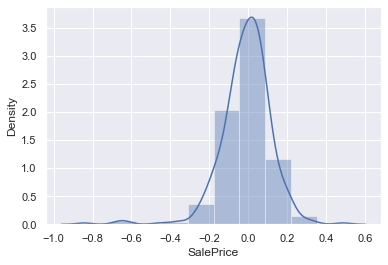

In [104]:
# Looking at errors
sns.distplot((y_test-y_pred_test), bins=10)
plt.show()

## Lasso

In [105]:
from sklearn.linear_model import Lasso
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [107]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [108]:
lasso.coef_

array([ 1.34155655e-02,  8.20698529e-03,  9.45487930e-02,  7.24873372e-02,
       -0.00000000e+00,  4.20286455e-01,  0.00000000e+00,  4.97695207e-02,
        4.59761853e-01,  9.53544880e-02,  4.59135472e-02,  9.11111744e-02,
        3.39057723e-02, -0.00000000e+00, -3.94120710e-02,  4.71336606e-02,
        2.72071933e-02,  0.00000000e+00,  9.21205400e-02,  6.29141758e-02,
        7.71333843e-02,  0.00000000e+00,  6.67771478e-02,  7.80462692e-02,
        2.24271968e-03, -1.60577709e-02,  2.14332639e-01, -2.31564524e-01,
       -5.11105054e-02, -0.00000000e+00,  0.00000000e+00, -8.54969058e-02,
       -2.10051157e-03, -0.00000000e+00, -1.42579640e-02,  0.00000000e+00,
        4.28213472e-02,  6.96496668e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.85277252e-01,
        2.80727050e-01,  2.32243851e-01,  1.93203607e-01,  2.54524724e-02,
        0.00000000e+00,  1.00741851e-02,  3.30125854e-02, -1.77201909e-02,
       -3.08494075e-02, -

In [109]:
lasso.intercept_

11.11404860041132

In [110]:

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test:",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test:",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train:",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test:",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Train: 0.9436133228064622
R2 Test: 0.8971727142488584
RSS Train: 8.07147554759812
RSS Test: 6.78603313991024
MSE Train: 0.008095762836106439
MSE Test: 0.01585521761661271


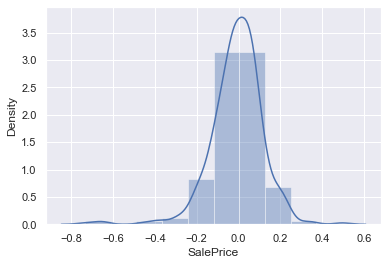

In [111]:
# Looking at errors
sns.distplot((y_test-y_pred_test), bins=10)
plt.show()

In [112]:
# Tabel that contains all the metrics:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.858527          0.939391          0.943613
1   R2 Score (Test)           0.824336          0.889889          0.897173
2       RSS (Train)          20.251121          8.675818          8.071476
3        RSS (Test)          11.592840          7.266715          6.786033
4       MSE (Train)           0.142520          0.093284          0.089976
5        MSE (Test)           0.164578          0.130301          0.125918

### Clearly Lasso Had the best output for us .
#### Lets see how the coeff were affected

In [113]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Linear']= 0

In [114]:
betas

Ridge     Lasso  Linear
LotFrontage            0.035136  0.013416       0
MasVnrArea             0.029767  0.008207       0
BsmtFinSF1             0.143783  0.094549       0
BsmtFinSF2             0.074762  0.072487       0
BsmtUnfSF              0.067771 -0.000000       0
...                         ...       ...     ...
SaleCondition_AdjLand  0.020466  0.013030       0
SaleCondition_Alloca   0.001879  0.009582       0
SaleCondition_Family  -0.032233 -0.036174       0
SaleCondition_Normal   0.088821  0.085256       0
SaleCondition_Partial  0.074512  0.078341       0

[224 rows x 3 columns]

In [115]:
#since we have different rowns in Linera due to RFE we need to fill them in manualy
val=0
for x in list(X_train_rfe.columns):
    betas.loc[x,"Linear"]=lm2.coef_[val]
    val=val+1

In [116]:
pd.set_option('display.max_rows', None)
betas.head(224)

Ridge     Lasso        Linear
LotFrontage              0.035136  0.013416  0.000000e+00
MasVnrArea               0.029767  0.008207  0.000000e+00
BsmtFinSF1               0.143783  0.094549 -4.077159e+11
BsmtFinSF2               0.074762  0.072487 -2.746678e+11
BsmtUnfSF                0.067771 -0.000000 -4.352944e+11
TotalBsmtSF              0.181881  0.420286  5.974118e+11
1stFlrSF                 0.174110  0.000000  0.000000e+00
2ndFlrSF                 0.117858  0.049770  0.000000e+00
GrLivArea                0.234325  0.459762  9.175720e-01
BsmtFullBath             0.092718  0.095354  0.000000e+00
BsmtHalfBath             0.035352  0.045914  0.000000e+00
FullBath                 0.096283  0.091111  0.000000e+00
HalfBath                 0.051303  0.033906  0.000000e+00
BedroomAbvGr             0.021768 -0.000000  0.000000e+00
KitchenAbvGr            -0.032414 -0.039412 -4.199982e-01
TotRmsAbvGrd             0.081429  0.047134  0.000000e+00
Fireplaces               0.043470  0.027207  0.000000e+00
GarageYrBlt              0.009574  0.000000  0.000000e+00
GarageCars               0.079636  0.092121  3.401184e-01
GarageArea               0.082318  0.062914  0.000000e+00
WoodDeckSF               0.076301  0.077133  0.000000e+00
OpenPorchSF              0.007476  0.000000  0.000000e+00
EnclosedPorch            0.052726  0.066777  0.000000e+00
ScreenPorch              0.064838  0.078046  0.000000e+00
MoSold                   0.007299  0.002243  0.000000e+00
YrSold                  -0.019491 -0.016058  0.000000e+00
LogLotArea               0.134038  0.214333  0.000000e+00
Age                     -0.111799 -0.231565 -4.045715e-01
YrSinceRemod            -0.060793 -0.051111  0.000000e+00
MSSubClass_1_5storyUnF  -0.012335 -0.000000  0.000000e+00
MSSubClass_1storyNew     0.012706  0.000000  0.000000e+00
MSSubClass_1storyOld    -0.084130 -0.085497  0.000000e+00
MSSubClass_1storyPUDnew -0.006565 -0.002101  0.000000e+00
MSSubClass_1storywAttic -0.001281 -0.000000  0.000000e+00
MSSubClass_2Family      -0.012792 -0.014258  0.000000e+00
MSSubClass_2_5story      0.020494  0.000000  0.000000e+00
MSSubClass_2storyNew     0.036957  0.042821  0.000000e+00
MSSubClass_2storyOld     0.059611  0.069650  0.000000e+00
MSSubClass_2storyPUDnew -0.024258 -0.000000  0.000000e+00
MSSubClass_Duplex        0.007537  0.000000  0.000000e+00
MSSubClass_Multi        -0.012425 -0.000000  0.000000e+00
MSSubClass_PUDmulti     -0.014238  0.000000  0.000000e+00
MSSubClass_Split         0.008883  0.000000  0.000000e+00
MSZoning_FV              0.083444  0.285277  5.595551e-01
MSZoning_RH              0.076879  0.280727  5.068970e-01
MSZoning_RL              0.054461  0.232244  5.095215e-01
MSZoning_RM              0.017780  0.193204  4.443359e-01
LotShape_IR2             0.030054  0.025452  0.000000e+00
LotShape_IR3             0.009544  0.000000  0.000000e+00
LotShape_Reg             0.006735  0.010074  0.000000e+00
LotConfig_CulDSac        0.032020  0.033013  0.000000e+00
LotConfig_FR2           -0.023284 -0.017720  0.000000e+00
LotConfig_FR3           -0.028538 -0.030849  0.000000e+00
LotConfig_Inside        -0.013701 -0.011295  0.000000e+00
Neighborhood_Blueste     0.007682  0.000000  0.000000e+00
Neighborhood_BrDale     -0.020534 -0.000000  0.000000e+00
Neighborhood_BrkSide     0.008480  0.025270  0.000000e+00
Neighborhood_ClearCr     0.036848  0.032709  0.000000e+00
Neighborhood_CollgCr    -0.008454 -0.000699  0.000000e+00
Neighborhood_Crawfor     0.110927  0.132545  0.000000e+00
Neighborhood_Edwards    -0.052610 -0.044111  0.000000e+00
Neighborhood_Gilbert    -0.012975 -0.000000  0.000000e+00
Neighborhood_IDOTRR     -0.061126 -0.003250  0.000000e+00
Neighborhood_MeadowV    -0.084137 -0.084731  0.000000e+00
Neighborhood_Mitchel    -0.035806 -0.036655  0.000000e+00
Neighborhood_NAmes      -0.020036 -0.008590  0.000000e+00
Neighborhood_NPkVill     0.031023  0.025287  0.000000e+00
Neighborhood_NWAmes     -0.016153 -0.014049  0.000000e+00
Neighborhood_NoRidge     0

In [117]:
#Finding 10 most important featues of these models 
betas["ABSRidge"]=abs(betas["Ridge"])
betas['ABSLasso']=abs(betas["Lasso"])
betas['ABSLinear']=abs(betas['Linear'])

In [118]:
betas["RidgeRank"]=betas["ABSRidge"].rank()
betas["LassoRank"]=betas["ABSLasso"].rank()
betas["LinearRank"]=betas["ABSLinear"].rank()
Ridge_imp=pd.DataFrame(betas.sort_values(by="RidgeRank",ascending= False).head(10).Ridge)
Lasso_imp=pd.DataFrame(betas.sort_values(by="LassoRank",ascending= False).head(10).Lasso)
Linear_imp=pd.DataFrame(betas.sort_values(by="LinearRank",ascending= False).head(10).Linear)

In [119]:
out="Ridge Regression:\n("
for x in range(len(Ridge_imp)):
    out=out+str(Ridge_imp.index[x])+"*"+str(round(Ridge_imp['Ridge'][x],3))+")"
    if x!=len(Ridge_imp)-1:
        out=out+"\n("
        
print(out)

Ridge Regression:
(GrLivArea*0.234)
(TotalBsmtSF*0.182)
(1stFlrSF*0.174)
(OverallCond_FA*-0.149)
(BsmtFinSF1*0.144)
(LogLotArea*0.134)
(OverallQual_EX*0.124)
(2ndFlrSF*0.118)
(Age*-0.112)
(Neighborhood_Crawfor*0.111)


In [120]:
out="Lasso Regression:\n("
for x in range(len(Lasso_imp)):
    out=out+Lasso_imp.index[x]+"*"+str(round(Lasso_imp['Lasso'][x],3))+")"
    if x!=len(Lasso_imp)-1:
        out=out+"\n("
        
print(out)

Lasso Regression:
(GrLivArea*0.46)
(TotalBsmtSF*0.42)
(MSZoning_FV*0.285)
(MSZoning_RH*0.281)
(MSZoning_RL*0.232)
(Age*-0.232)
(LogLotArea*0.214)
(OverallCond_FA*-0.207)
(MSZoning_RM*0.193)
(OverallQual_EX*0.153)


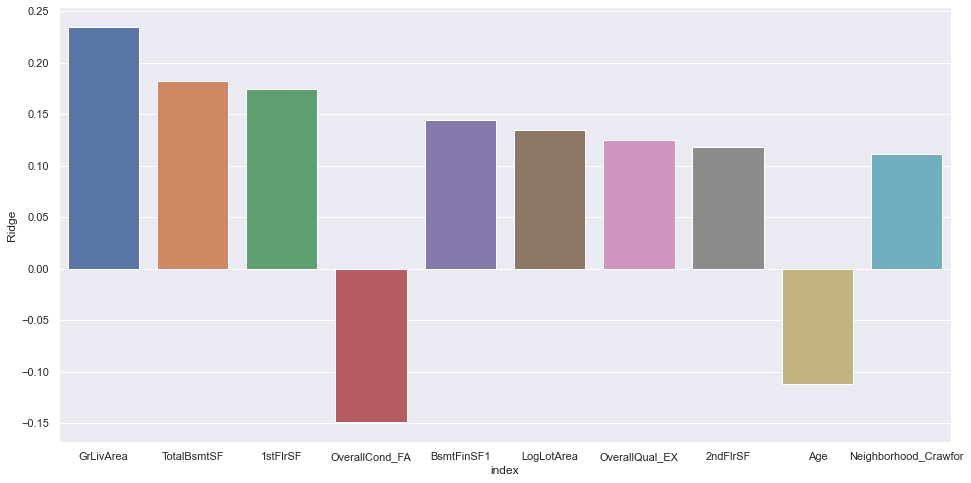

In [121]:
Ridge_imp=Ridge_imp.reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x="index",y="Ridge",data=Ridge_imp)
plt.show()

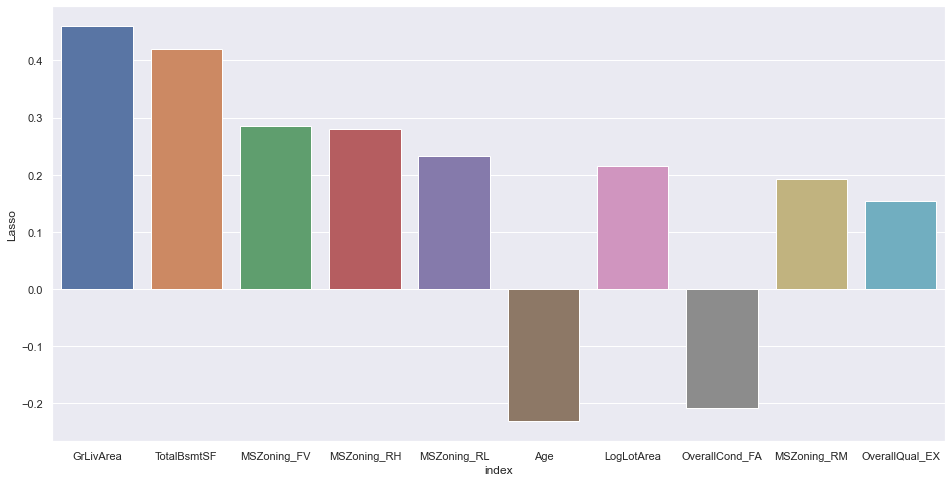

In [122]:
Lasso_imp=Lasso_imp.reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x="index",y="Lasso",data=Lasso_imp)
plt.show()

In [123]:
Lasso_imp

index     Lasso
0       GrLivArea  0.459762
1     TotalBsmtSF  0.420286
2     MSZoning_FV  0.285277
3     MSZoning_RH  0.280727
4     MSZoning_RL  0.232244
5             Age -0.231565
6      LogLotArea  0.214333
7  OverallCond_FA -0.207483
8     MSZoning_RM  0.193204
9  OverallQual_EX  0.153338

### So we see that with both Ridge and Lasso we are getting a decent score. We can use either for the final model and because of Feature selection we will choose Lasso regression in this case.
#### Most Significant Variables for Lasso
*	GrLivArea	     0.459762
*	TotalBsmtSF	     0.420286
*	MSZoning_FV	     0.285277
*	MSZoning_RH	     0.280727
*	MSZoning_RL	     0.232244
*	Age	            -0.231565
*	LogLotArea	     0.214333
*	OverallCond_FA	-0.207483
*	MSZoning_RM	     0.193204
*	OverallQual_EX	 0.153338
# Final Conclusion :
### we got a decent score for both Ridge and Lasso regression.

* Ridge : Train :93.9% Test :88.9%

* Lasso : Train :94.3 Test :89.4%

Optimal Value of alpha
Optimal Value of alpha for ridge : 4.0

Optimal Value of alpha for Lasso : 0.0001

 

# Part 2- Modification of models for the problem  
In part 2 of the assignment we are expected to modify the model as per the Questions this is the part of the notebook that we perform those actions .


In [124]:
# Running Ridge with double alphas :
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.03658373  0.03076957  0.12682952  0.05186793  0.05579842  0.15106096
  0.16565442  0.09973539  0.21292473  0.08188926  0.02449336  0.0867193
  0.05271569  0.03258822 -0.02067235  0.09138849  0.04401813  0.01551207
  0.07922601  0.08081351  0.06801632  0.01223695  0.04270544  0.05409258
  0.00868157 -0.01911666  0.11025472 -0.08032365 -0.0662062  -0.00763429
  0.01851258 -0.08123984 -0.00277805  0.00079178 -0.0124619   0.01929938
  0.02812407  0.0523482  -0.03269572  0.00782281 -0.00832041 -0.01665963
  0.00438781  0.05766165  0.04856516  0.0385476  -0.0073337   0.02779734
  0.00567765  0.00285959  0.03008545 -0.02083081 -0.01657952 -0.01417723
  0.00429541 -0.01514615  0.00851537  0.03612566 -0.01064055  0.10045186
 -0.04972246 -0.02079048 -0.05501826 -0.06855852 -0.02870023 -0.01927197
  0.01815026 -0.01101115  0.04322137  0.05930813 -0.04625159 -0.00566807
 -0.01844475 -0.01273636  0.02873463  0.07195859 -0.00327476  0.02329417
 -0.0124619   0.00782281 -0.03952397 -0.01029701  0.

In [125]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


0.9348082191334
0.8865124934144363


In [126]:
betas3 = pd.DataFrame(index=X_train.columns)
betas3.rows = X_train.columns
betas3['Ridge'] = ridge.coef_
betas3["ABSRidge"]=abs(betas3["Ridge"])
betas3["RidgeRank"]=betas3["ABSRidge"].rank()

In [127]:
Ridge_imp2=pd.DataFrame(betas3.sort_values(by="RidgeRank",ascending= False).head(10).Ridge)
out="Ridge Regression:\n("
for x in range(len(Ridge_imp2)):
    out=out+str(Ridge_imp2.index[x])+"*"+str(round(Ridge_imp2['Ridge'][x],3))+")"
    if x!=len(Ridge_imp2)-1:
        out=out+"\n("
        
print(out)

Ridge Regression:
(GrLivArea*0.213)
(1stFlrSF*0.166)
(TotalBsmtSF*0.151)
(BsmtFinSF1*0.127)
(OverallCond_FA*-0.119)
(OverallQual_EX*0.113)
(LogLotArea*0.11)
(Neighborhood_Crawfor*0.1)
(2ndFlrSF*0.1)
(OverallQual_VG*0.096)


In [128]:
# Lasso With double alpha value .
lasso2 = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
alpha =0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [130]:
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test:",r2_test_lr)


R2 Train: 0.940203645446254
R2 Test: 0.892691774260566


In [131]:
betas4 = pd.DataFrame(index=X_train.columns)
betas4.rows = X_train.columns
betas4['Lasso'] = lasso2.coef_
betas4["ABSLasso"]=abs(betas4["Lasso"])
betas4["LassoRank"]=betas4["ABSLasso"].rank()
Lasso_imp2=pd.DataFrame(betas4.sort_values(by="LassoRank",ascending= False).head(10).Lasso)
out="Lasso Regression:\n("
for x in range(len(Lasso_imp2)):
    out=out+str(Lasso_imp2.index[x])+"*"+str(round(Lasso_imp2['Lasso'][x],3))+")"
    if x!=len(Lasso_imp2)-1:
        out=out+"\n("
        
print(out)

Lasso Regression:
(GrLivArea*0.482)
(TotalBsmtSF*0.406)
(Age*-0.225)
(LogLotArea*0.216)
(OverallCond_FA*-0.205)
(OverallQual_EX*0.155)
(MSZoning_FV*0.137)
(OverallQual_VE*0.134)
(Neighborhood_Crawfor*0.133)
(MSZoning_RH*0.132)


In [132]:
# Building the lasso model without the 5 top features of the original model 
dro_cols=["GrLivArea","TotalBsmtSF","MSZoning_FV","MSZoning_RH","MSZoning_RL"]
X_train_miss=X_train.drop(dro_cols,axis=1)

In [133]:
lasso2 = Lasso()
# cross validation
model_cv2 = GridSearchCV(estimator = lasso2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train_miss, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
print(model_cv2.best_params_)

{'alpha': 0.0001}


In [135]:
alpha =0.0001

lasso2= Lasso(alpha=alpha)
        
lasso2.fit(X_train_miss, y_train)

Lasso(alpha=0.0001)

In [136]:
X_test_miss=X_test.drop(dro_cols,axis=1)
y_pred_train = lasso2.predict(X_train_miss)
y_pred_test = lasso2.predict(X_test_miss)
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test:",r2_test_lr)
betas2 = pd.DataFrame(index=X_train_miss.columns)
betas2.rows = X_train_miss.columns
betas2['Lasso'] = lasso2.coef_
betas2['ABSLasso']=abs(betas2["Lasso"])
betas2["LassoRank"]=betas2["ABSLasso"].rank()
Lasso_imp2=pd.DataFrame(betas2.sort_values(by="LassoRank",ascending= False).head(10).Lasso)
out="Lasso Regression:\n("
for x in range(len(Lasso_imp)):
    out=out+Lasso_imp2.index[x]+"*"+str(round(Lasso_imp2['Lasso'][x],3))+")"
    if x!=len(Lasso_imp2)-1:
        out=out+"\n("
        
print(out)

R2 Train: 0.9408893318949744
R2 Test: 0.88912268805979
Lasso Regression:
(1stFlrSF*0.401)
(BsmtFinSF1*0.353)
(2ndFlrSF*0.349)
(BsmtUnfSF*0.276)
(BsmtFinSF2*0.258)
(Age*-0.229)
(OverallCond_FA*-0.206)
(LogLotArea*0.203)
(OverallQual_EX*0.154)
(OverallQual_VE*0.139)
